In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir,'..')))

In [2]:
import yfinance as yf
import pandas as pd

# Define the tickers and time period
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2025-01-31"

# Fetch historical data
data = yf.download(tickers, start=start_date, end=end_date)

# Save the data to a CSV file for future use
data.to_csv("../data/financial_data.csv")

# Display the first few rows
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed

Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-01-02  62.573059  172.592865  14.620667  62.603343  173.811099   
2015-01-05  62.754807  169.475891  14.006000  62.777518  171.702294   
2015-01-06  62.936516  167.879608  14.085333  63.125787  170.316050   
2015-01-07  62.974380  169.971603  14.063333  63.050088  170.316070   
2015-01-08  62.875950  172.987732  14.041333  62.921373  173.206180   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-01-02  14.883333  62.398927  171.542672  14.217333  62.406500   
2015-01-05  14.433333  62.610958  169.165038  13.810667  62.641243   
2015-01-06  14.280000  62.860808  167.073055  13.614000  62.860808   
2015-01-07 

** Data Cleaning and Understanding**

In [3]:
# Check basic statistics for each asset
print(data.describe())

# Check data types and missing values
print(data.info())

Price         Close                                   High               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean      69.289451   316.067402   117.848209    69.391261   317.725660   
std        4.792146   117.926910   116.508288     4.800409   118.486410   
min       61.860889   156.800827     9.578000    61.937392   157.864121   
25%       65.565304   214.841988    17.228000    65.630173   215.702222   
50%       68.329124   277.117920    30.298000    68.457869   277.919519   
75%       72.879944   405.869156   221.525002    72.946455   409.134310   
max       78.823250   609.750000   479.859985    78.920188   610.780029   

Price                        Low                                   Open  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean     120.474827    6

In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values using forward fill or interpolation
data.ffill(inplace=True)  # Forward fill
# Alternatively, use interpolation: data.interpolate(method='linear', inplace=True)

Price   Ticker
Close   BND       0
        SPY       0
        TSLA      0
High    BND       0
        SPY       0
        TSLA      0
Low     BND       0
        SPY       0
        TSLA      0
Open    BND       0
        SPY       0
        TSLA      0
Volume  BND       0
        SPY       0
        TSLA      0
dtype: int64


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the 'Close' prices for each asset
scaler = MinMaxScaler()
data[['TSLA_Close', 'BND_Close', 'SPY_Close']] = scaler.fit_transform(data[['Close']])

**Exploratory Data Analysis (EDA)**

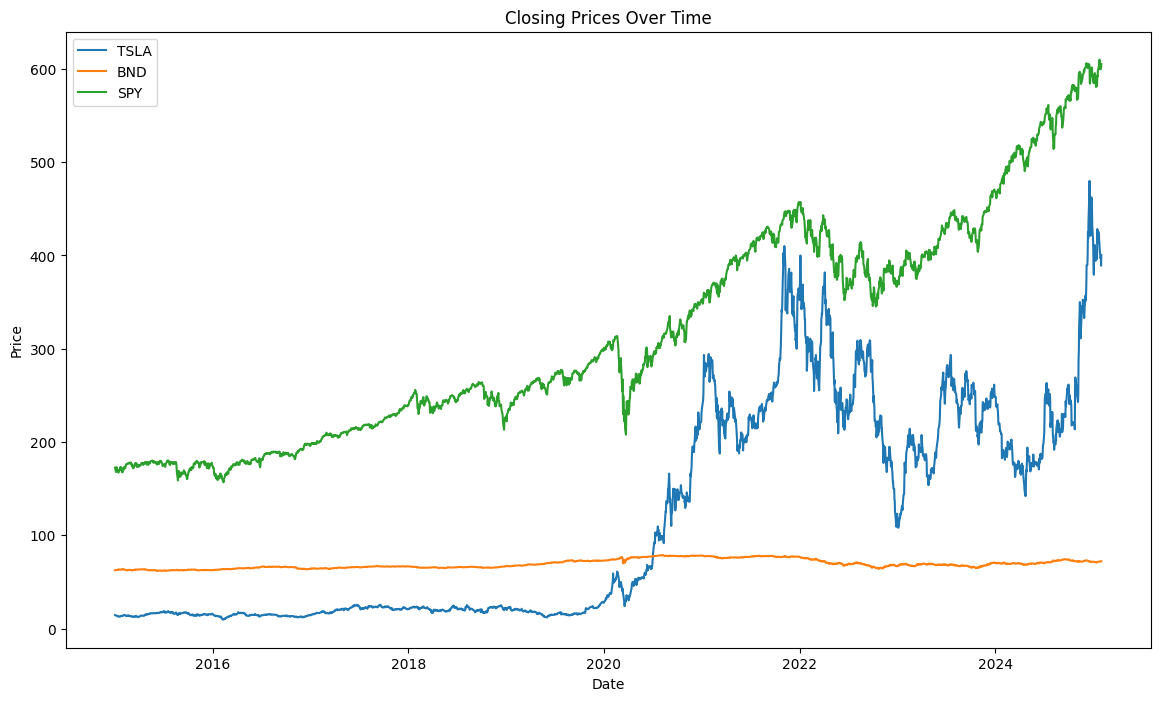

In [6]:
import matplotlib.pyplot as plt

# Plot closing prices
plt.figure(figsize=(14, 8))
plt.plot(data['Close']['TSLA'], label='TSLA')
plt.plot(data['Close']['BND'], label='BND')
plt.plot(data['Close']['SPY'], label='SPY')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

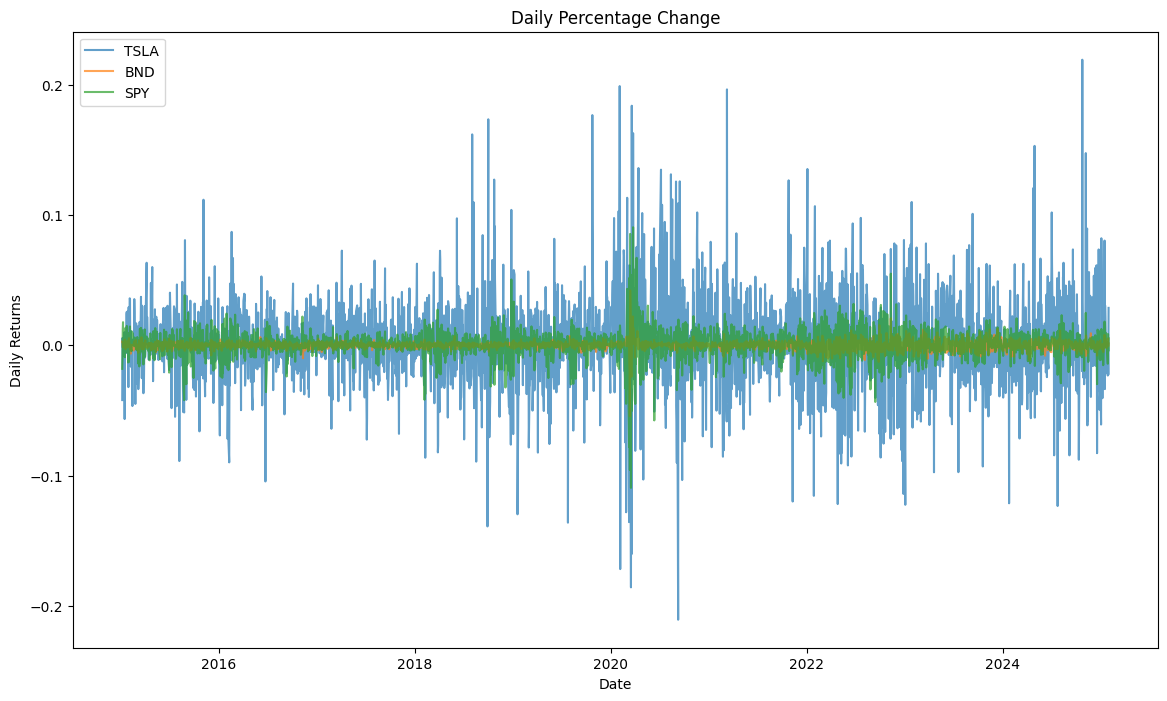

In [7]:
# Calculate daily percentage change
daily_returns = data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 8))
plt.plot(daily_returns['TSLA'], label='TSLA', alpha=0.7)
plt.plot(daily_returns['BND'], label='BND', alpha=0.7)
plt.plot(daily_returns['SPY'], label='SPY', alpha=0.7)
plt.title('Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

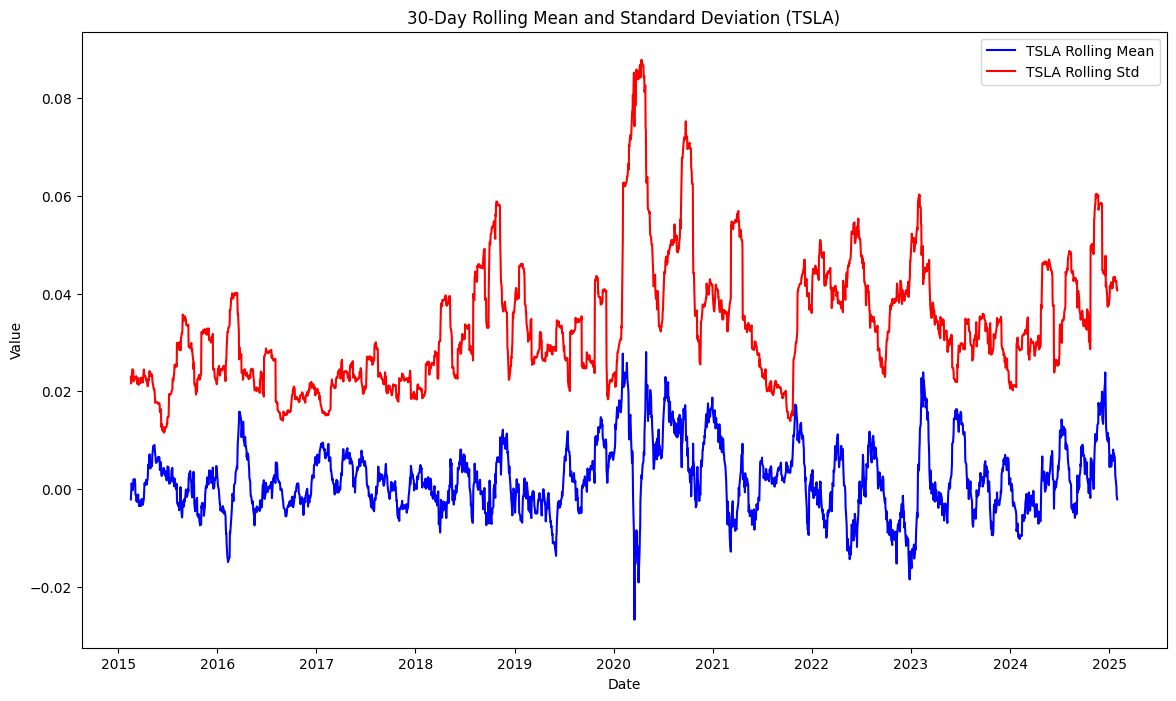

In [8]:
# Calculate rolling mean and standard deviation (30-day window)
rolling_mean = daily_returns.rolling(window=30).mean()
rolling_std = daily_returns.rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(14, 8))
plt.plot(rolling_mean['TSLA'], label='TSLA Rolling Mean', color='blue')
plt.plot(rolling_std['TSLA'], label='TSLA Rolling Std', color='red')
plt.title('30-Day Rolling Mean and Standard Deviation (TSLA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [9]:
# Identify outliers using Z-scores
from scipy.stats import zscore

z_scores = zscore(daily_returns)
outliers = (z_scores > 3) | (z_scores < -3)
print("Outliers in Daily Returns:")
print(outliers.sum())

Outliers in Daily Returns:
0


**Seasonality and Trends**

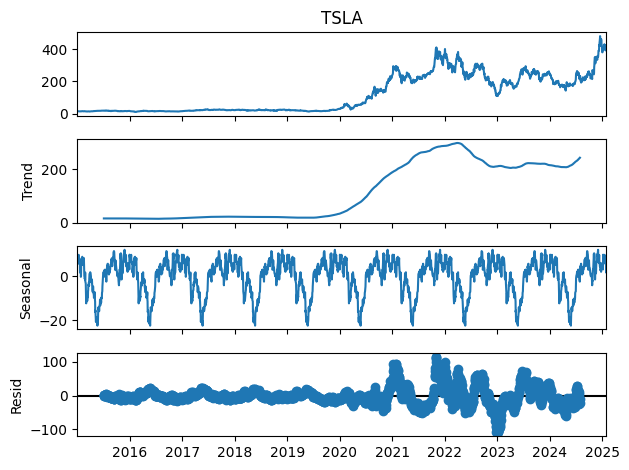

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose TSLA's closing price
tsla_decomposition = seasonal_decompose(data['Close']['TSLA'], period=252)  # 252 trading days in a year
tsla_decomposition.plot()
plt.show()

**Key Insights**

In [11]:
import numpy as np

# Calculate VaR (95% confidence level)
var_95 = daily_returns.quantile(0.05)
print("Value at Risk (95% Confidence Level):")
print(var_95)

# Calculate Sharpe Ratio (assuming risk-free rate = 0)
sharpe_ratio = daily_returns.mean() / daily_returns.std() * np.sqrt(252)
print("Sharpe Ratio:")
print(sharpe_ratio)

Value at Risk (95% Confidence Level):
Ticker
BND    -0.004801
SPY    -0.016719
TSLA   -0.051387
Name: 0.05, dtype: float64
Sharpe Ratio:
Ticker
BND     0.288986
SPY     0.797519
TSLA    0.860690
dtype: float64
